![KPMG logo](https://th.bing.com/th/id/OIP.FAkgKvaU8I825ap8Gd_OggAAAA?pid=ImgDet&rs=1)

# KPMG VIRTUAL INTERNSHIP
### Sprocket Central Pty Ltd
Dataset has been provided by KPMG virtual internship through Forage. See [Forage.com](forage.com) for more details

### Objectives:
In this lab:
* Explore Customer List Table Distribution(Preprocessing, and Understanding the Data)
* Feature Engineering
* Data Validation with External Datasets:
* Customer Segmentation Model:
* Interpretation of Model Insights:
* Conclusion

##### Explore Customer List Table Distribution:
Ensure Data Quality: we will perform data checks to address missing values and normalize data, ensuring it is suitable for analysis.


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('ggplot')

In [2]:
#load dataset into lab and store in pandas dataframe 
# NB: For purpose of independent analysis, tables have been stored seperately as csv files using Excel
trndat=pd.read_csv('transaction_data.csv',header=1)
custdat=pd.read_csv('customer_data.csv')
newcus=pd.read_csv('New_customer_list.csv',header=1)

We will clean up the data prior to exploring and modelling the data

In [3]:
#TRANSACTION DATA
#Replace missing values in online order based on the distribution
dist=trndat['online_order'].mode()[0]
trndat['online_order'].fillna(dist, inplace=True)

#drop missing values in 'product_line','product_class','product_size','brand', 'product first_sold_date',standard_cost
trndat.dropna(axis=0,inplace=True)

#check to see if any errors exist
trndat.isnull().sum()


transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [4]:
#normalize the standard_cost column
trndat['standard_cost']=trndat['standard_cost'].str.replace('$', '')
trndat['standard_cost']=trndat['standard_cost'].str.replace(',', '')
trndat['standard_cost']=trndat['standard_cost'].astype(float)
trndat['standard_cost']

0          53.62
1         388.92
2         248.82
3         381.10
4         709.48
          ...   
19995    1203.40
19996     312.74
19997      44.71
19998     136.73
19999    1580.47
Name: standard_cost, Length: 19803, dtype: float64

In [5]:
#OLD CUSTOMER DATA

#drop column default 
custdat.drop('default', axis=1,inplace=True)
#drop missing rows in last name, DOB and tenure
custdat=custdat.dropna(subset=['DOB','last_name','tenure'])

#Replace missing values in job title and Job industry category based on the distribution of the dataset
jobdis=custdat['job_title'].mode()[0]
jobidis=custdat['job_industry_category'].mode()[0]
custdat['job_title'].fillna(jobdis,inplace=True)
custdat['job_industry_category'].fillna(jobidis,inplace=True)

#Replace 'U' based on the distribution,normalize 'M','F' to Male and Female respectively. correct spelling 'Femal'
gendis=custdat['gender'].mode()[0]
custdat['gender']=custdat['gender'].replace('U',gendis)
custdat['gender']=custdat['gender'].replace('Femal','Female')
custdat['gender']=custdat['gender'].replace('F','Female')
custdat['gender']=custdat['gender'].replace('M','Male')

#Normalize New South Wales and Victoria
custdat['state']=custdat['state'].replace('New South Wales','NSW')
custdat['state']=custdat['state'].replace('Victoria','VIC')
custdat['state']=custdat['state'].replace('V','VIC')
#Handle error in Year of Date of Birth
custdat['DOB']=custdat['DOB'].replace('1843-12-21','1943-12-21')
custdat['DOB_Year']=custdat['DOB_Year'].replace(1843.0,1943.0)

#check table to confirm error has been removed
custdat.isnull().sum()


customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
DOB_Year                               0
dtype: int64

In [6]:
print(custdat['gender'].unique())
print(custdat['state'].unique())
print(custdat[custdat['DOB']=='1943-12-21'])

['Female' 'Male']
['NSW' 'VIC' 'QLD']
    customer_id         address  postcode state    country  \
29           34  833 Luster Way      4005   QLD  Australia   

    property_valuation first_name last_name  gender  \
29                   8   Jephthah  Bachmann  Female   

    past_3_years_bike_related_purchases         DOB        job_title  \
29                                 59.0  1943-12-21  Legal Assistant   

   job_industry_category     wealth_segment deceased_indicator owns_car  \
29                    IT  Affluent Customer                  N       No   

    tenure  DOB_Year  
29    20.0    1943.0  


In [7]:
newcus.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [8]:
#NEW CUcolumns DATA

#drop unnamed column
newcus.drop('Unnamed: 16', axis=1,inplace=True)
newcus.drop('Unnamed: 17', axis=1,inplace=True)
newcus.drop('Unnamed: 18', axis=1,inplace=True)
newcus.drop('Unnamed: 19', axis=1,inplace=True)
newcus.drop('Unnamed: 20', axis=1,inplace=True)

#drop missing rows in 'last name',and 'Date of Birth'
newcus.dropna(subset=['last_name','DOB'],axis=0,inplace=True)

#Replace Job title based on the distribution
jobdist=newcus['job_title'].mode()[0]
newcus['job_title'].fillna(jobdist,inplace=True)

#Replace Jobh industry based on the distribution
jobidist=newcus['job_industry_category'].mode()[0]
newcus['job_industry_category'].fillna(jobidist, inplace=True)

#check errors
newcus.isnull().sum()


first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

#### Diving into the Characteristics: We will now explore the customer list dataset to gain insights into its characteristics and distribution.
Identify Notable Features: Identify and document notable features within the dataset.

In [9]:
#Let's group the DOB into age brackets
#first get the min and max age
custdat['DOB_Year']=custdat['DOB_Year'].astype(int)

print(custdat.DOB_Year.min())
print(custdat.DOB_Year.max())

1931
2002


In [10]:
import datetime
bins=[15,25,35,45,55,65,75,85,95]
labels=['15-24','25-34','35-44','45-54','55-64','65-74','75-84','85-94']
current_year = datetime.datetime.now().year
custdat['Age'] = current_year - custdat['DOB_Year']

custdat['Age_Group']=pd.cut(custdat['Age'],bins=bins,labels=labels,right=False)
custdat['Age_Group']

0       65-74
1       35-44
3       45-54
4       55-64
5       45-54
        ...  
3989    25-34
3990    45-54
3991    45-54
3992    15-24
3995    25-34
Name: Age_Group, Length: 3788, dtype: category
Categories (8, object): ['15-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65-74' < '75-84' < '85-94']

C:\Users\Admin\AppData\Local\Temp\ipykernel_7008\4146088403.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(labels=incbin.index,rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7008\4146088403.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 2].set_xticklabels(labels=dobplt.index,rotation=45)


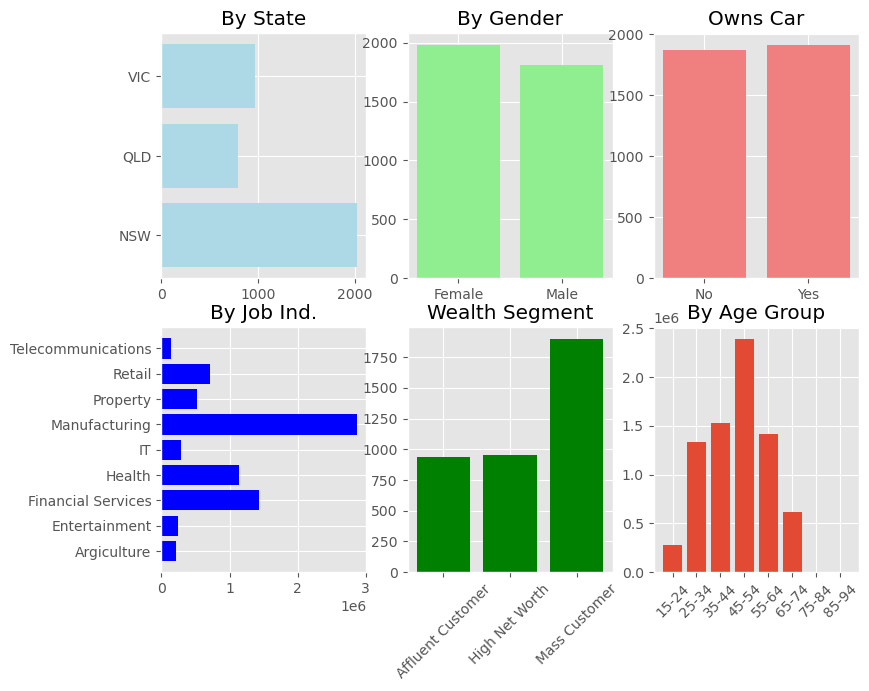

In [11]:
#lets plot the Customer data to understand the distribution of the dataset

fig, ax=plt.subplots(2,3, figsize=(9,7))

State=custdat.groupby(custdat['state'])['customer_id'].count()
ax[0, 0].barh(State.index, State.values,color='lightblue')
ax[0, 0].set_title('By State')


den=custdat[['gender','customer_id']]
gend=custdat.groupby(custdat['gender'])['customer_id'].count()

ax[0, 1].bar(gend.index, gend.values,color='lightgreen')
ax[0, 1].set_title('By Gender')

carbin=pd.get_dummies(custdat['owns_car']).sum()
ax[0, 2].bar(carbin.index, carbin.values,color='lightcoral')
ax[0, 2].set_title('Owns Car')

jobin=custdat[['job_industry_category','customer_id']]
jobin=jobin.groupby(['job_industry_category'])['customer_id'].sum()
ax[1, 0].barh(jobin.index,jobin.values, color='blue')
ax[1,0].set_title('By Job Ind.')

incbin=pd.get_dummies(custdat['wealth_segment']).sum()
ax[1, 1].bar(incbin.index,incbin.values,color='green')
ax[1, 1].set_title('Wealth Segment')
ax[1, 1].set_xticklabels(labels=incbin.index,rotation=45)

custda=custdat[['Age_Group','customer_id']]
dobplt=custda.groupby(['Age_Group'])['customer_id'].sum()
ax[1, 2].bar(dobplt.index,dobplt.values)
ax[1, 2].set_title('By Age Group')
ax[1, 2].set_xticklabels(labels=dobplt.index,rotation=45)


plt.show()

##### Inference: from the above visualization
* New South Wales is the state with the highest number of customers
* Mass Customer has the highest number in the wealth segment demographic
* There is no significant difference in the data of Car ownership 
* The highest number of customers is within the Age group (45-54)
* There is no significant difference for the Gender column
* Manufacturing industry are the highest number of customers

#### Feature Engineering:

##### Now, that we have understood the distribution of the customers, we will create a table for the features and merge it with the transaction table to understand 
the behaviour of these different features 


In [31]:
#create new table: features
features=custdat[['customer_id','state','gender','owns_car','job_industry_category','wealth_segment','Age_Group']]
#merge feature table with transaction data
feattrn=pd.merge(trndat,features,on='customer_id',how='outer')

feattrn.shape
feattrn.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,state,gender,owns_car,job_industry_category,wealth_segment,Age_Group
0,1.0,2.0,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,VIC,Male,Yes,Financial Services,Mass Customer,65-74
1,11065.0,1.0,2950,10/16/2017,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,VIC,Male,Yes,Financial Services,Mass Customer,65-74


C:\Users\Admin\AppData\Local\Temp\ipykernel_7008\1098379073.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(labels=trnag.index,rotation=40)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7008\1098379073.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 2].set_xticklabels(labels=trnwel.index,rotation=40)


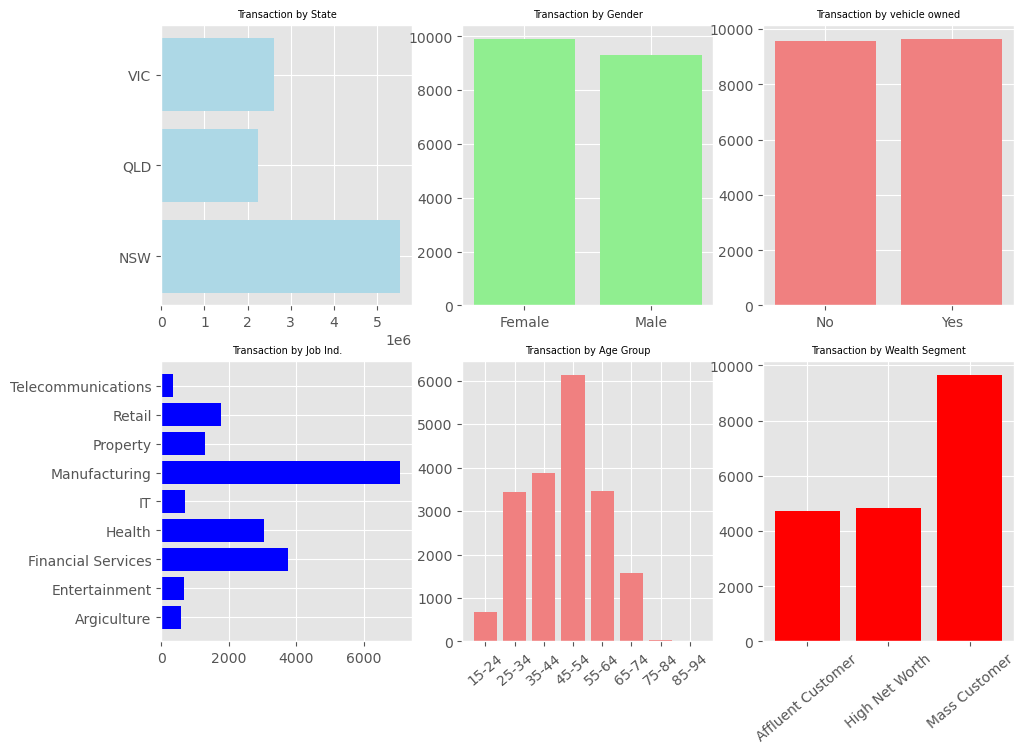

In [13]:
#let's create visualizations to compare customer's transaction behavior

#Transaction by state
trnb=feattrn[['state','standard_cost']]
trnbstate=trnb.groupby(['state'])['standard_cost'].sum()

fig,ax=plt.subplots(2,3,figsize=(11,8))

ax[0, 0].barh(trnbstate.index,trnbstate.values, color='lightblue')
ax[0, 0].set_title('Transaction by State',fontsize =7)

#Transaction by Gender
trng=feattrn.groupby(['gender'])['customer_id'].count()
ax[0, 1].bar(trng.index,trng.values,color='lightgreen')
ax[0, 1].set_title('Transaction by Gender',fontsize=7)

#Transaction by vehicles Owned
veh=pd.get_dummies(feattrn['owns_car']).sum()
ax[0, 2].bar(veh.index,veh.values,color='lightcoral')
ax[0, 2].set_title('Transaction by vehicle owned',fontsize=7)

#Transaction by job industry
trnjob=feattrn.groupby(['job_industry_category'])['customer_id'].count()
ax[1, 0].barh(trnjob.index,trnjob.values,color='blue')
ax[1, 0].set_title('Transaction by Job Ind.',fontsize=7)

#Transaction by Age Group
trnag=feattrn.groupby(['Age_Group'])['customer_id'].count()
ax[1, 1].bar(trnag.index,trnag.values,color='lightcoral')
ax[1, 1].set_title('Transaction by Age Group',fontsize=7)
ax[1, 1].set_xticklabels(labels=trnag.index,rotation=40)

#Transaction by wealth segment
trnwel=pd.get_dummies(feattrn['wealth_segment']).sum()
ax[1, 2].bar(trnwel.index,trnwel.values,color='red')
ax[1, 2].set_title('Transaction by Wealth Segment',fontsize=7)
ax[1, 2].set_xticklabels(labels=trnwel.index,rotation=40)


plt.show()



### Data Validation with External Datasets:

Strengthen Findings : We will enhance the credibility and accuracy of our insights by validating our results using external datasets sourced from the Australia Bureau Of Statistics.
Cross-Referencing: Compare our findings against authoritative and comprehensive external data sources.

In [14]:
#let us now load our external dataset from the Australia bureau of Statistics to compare and validate our Results:(

#NB: Data has been modified for Motorbike entries only for the purpose of this lab.

#Motorbike Transportation by age and gender
absag=pd.read_csv('transportation by age and gender.csv')
absag.head(7)
absag=absag[['Age','Male','Female']]
absag=absag.head(7)

#Motorbike Transportation by State
absas=pd.read_csv('transportation by state and territory.csv')
absas=absas[['State/Territory','Motorbike/scooter']].head(9)
absas

#Mototrbike as transportation method by vehicles owned
absvo=pd.read_csv('transportation method by vehicles owned.csv')


#motorbike Transportation by transportation method by personal income
abspi=pd.read_csv('transportation method by personal income.csv')
abspi=abspi[['Personal Income','Motorbike/Scooter']].head(15)

#preprocess data
abspi['Motorbike/Scooter']=abspi['Motorbike/Scooter'].str.replace(',','').astype(int)

#Classifying the table to wealth segment
abspi['Personal Income']=abspi['Personal Income']*52 #multiply weekly income by 52 weeks to determine income level

In [30]:
abspi['Personal Income'].astype(int)
Bins=[0, 40000, 90000, np.inf]
labels=['Mass Customer','Affluent','High Net Worth']
abspi['wealth_segment']=pd.cut(abspi['Personal Income'],bins=Bins,labels=labels)
abspi['wealth_segment']=abspi['wealth_segment'].fillna('Mass Customer')


In [16]:
#prepocessing
absag['Male']=absag['Male'].str.replace(',','').astype(int)
absag['Female']=absag['Female'].str.replace(',','').astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7008\1384879895.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(labels=absas['State/Territory'],rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7008\1384879895.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 2].set_xticklabels(labels=absvo["Vehicles owned"],rotation=90)


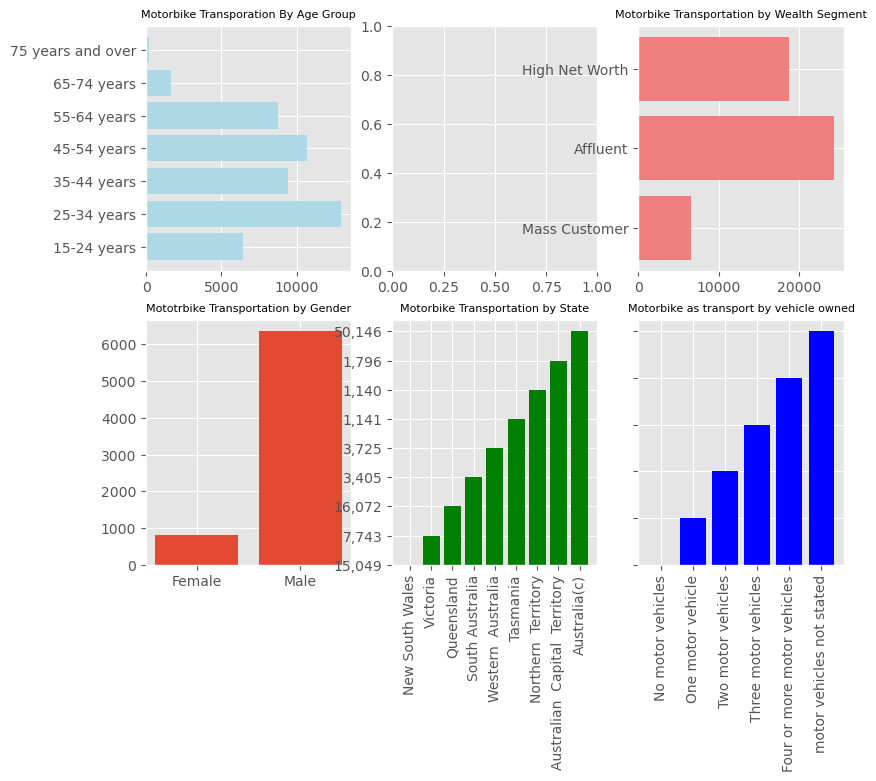

In [17]:


#Visualize the dataset
absa=absag[['Female','Male']].mean()
fig,ax=plt.subplots(2,3,figsize=(9,7))

#by Age_Group
absag['total']=absag['Male'] + absag['Female']
absage=absag[['Age','total']]
ax[0, 0].barh(absage.Age,absage.total,color='lightblue')
ax[0, 0].set_title('Motorbike Transporation By Age Group', fontsize=8)

#Motorbike by wealth segment
abspii=abspi.groupby(['wealth_segment'])['Motorbike/Scooter'].sum()
ax[0, 2].barh(abspii.index,abspii.values,color='lightcoral')
ax[0, 2].set_title('Motorbike Transportation by Wealth Segment',fontsize=8)


#By Gender
ax[1, 0].bar(absa.index,absa.values)
ax[1, 0].set_title('Mototrbike Transportation by Gender',fontsize=8)

#Motorbike transaction by state
ax[1, 1].bar(absas['State/Territory'],absas['Motorbike/scooter'],color='green')
ax[1, 1].set_title('Motorbike Transportation by State',fontsize=8)
labels=''
ax[1, 1].set_xticklabels(labels=absas['State/Territory'],rotation=90)


#Motorbike as method of transportation by vehicle owned
ax[1, 2].bar(absvo['Vehicles owned'],absvo['Motorbike/scooter'],color='blue')
ax[1, 2].set_title('Motorbike as transport by vehicle owned',fontsize=8)
ax[1, 2].set_xticklabels(labels=absvo["Vehicles owned"],rotation=90)
ax[1, 2].set_yticklabels('')

plt.show()

##### Comparing the Customer transaction distribution with the Dataset from Australia Bureau of statistics census data(Motorbike as Method of Transportation)
from the visualizations above,we can draw inconsistencies and similarity as follows:
##### Inconsistencies:
* New South Wales is the least state with motorbike usage unlike the transaction data that shows a high number of buyers
* Male demographic has a very high disparity to the female in motorbike usage, unlike the Transaction data that shows similiarity
* Affluent segment customers are the highest number of users unlike the Transaction table that shows Mass Customer

##### Similiarities:
* Age group (45-54) are not the highest number of users, however they have a high number of usage as they are the second highest number of users

    

#### Model Building
##### We will employ a CUSTOMER SEGMENTATION APPROACH

in other to make our model consistent with the Customer Data and Australian Bureau of Statistics, we will highlight the following features for the customer segmentation:
* Gender segmentation
* Age Group
* Vehicles owned
* State
* Wealth segment


##### Customers will be divided into two segments in each category
let's define the categories and add them to our customer dataset:
* Gender (Dominant, Balanced)
* Age (Enthusiast,others)
* Vehicles owned (high, normal)
* State (high_usage,normal)
* Wealth segment (Frequent,others)

In [29]:
#segmenting customers table with features
#Gender
category_mapping={'Male':'Dominant','Female':'Balanced'}
custdat['gender_segment']=custdat['gender'].map(category_mapping) 
custdat.head()

#Age Group
category_map={'65-74':'others','35-44':'enthusiast','45-54':'enthusiast','55-64':'others','15-24':'others','25-34':'others','65-74':'others','75-84':'others','85-94':'others'}
custdat['age_segment']=custdat['Age_Group'].map(category_map)

#vehicle owned
cat_map={'Yes':'High-buyer','No':'Normal'}
custdat['owns_car_segment']=custdat['owns_car'].map(cat_map)

#State
camap={'QLD':'High-usage','NSW':'Regular','VIC':'Regular'}
custdat['state_segment']=custdat['state'].map(camap)

#Wealth
cmp={'Mass Customer':'others','High Net Worth':'others','Affluent Customer':'frequent'}
custdat['wealth_segment_buy']=custdat.wealth_segment.map(cmp)

custdat.head()
    

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,owns_car,tenure,DOB_Year,Age,Age_Group,gender_segment,age_segment,owns_car_segment,state_segment,wealth_segment_buy
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93.0,...,Yes,11.0,1953,70,65-74,Balanced,others,High-buyer,Regular,others
1,2,6 Meadow Vale Court,2153,NSW,Australia,10,Eli,Bockman,Male,81.0,...,Yes,16.0,1980,43,35-44,Dominant,enthusiast,High-buyer,Regular,others
3,5,17979 Del Mar Point,2448,NSW,Australia,4,Sheila-kathryn,Calton,Female,56.0,...,Yes,8.0,1977,46,45-54,Balanced,enthusiast,High-buyer,Regular,frequent
4,6,9 Oakridge Court,3216,VIC,Australia,9,Curr,Duckhouse,Male,35.0,...,Yes,13.0,1966,57,55-64,Dominant,others,High-buyer,Regular,others
5,7,4 Delaware Trail,2210,NSW,Australia,9,Fina,Merali,Female,6.0,...,Yes,11.0,1976,47,45-54,Balanced,enthusiast,High-buyer,Regular,frequent


#### Interpretation

The customer segmentation model is based on the insights gathered from the data exploration and feature engineering phase. the model segments customers into two distinct groups based on features including: State, Gender, Age, Vehicles owned, and Wealth segment.

1. State-Based Segmentation:
High Motorbike Usage States(High Usage): This segment comprises customers from states where motorbike usage is high. It's likely that these customers have a strong interest in motorbikes or reside in areas where motorbikes are popular. Marketing strategies for this segment might include promotions related to popular motorbike models and accessories.

Low Motorbike Usage States(Regular): Customers from states with low motorbike usage fall into this segment. Understanding why motorbikes are less popular in these areas could guide marketing efforts. It might be worthwhile to explore the reasons behind the disparity.

2. ##### Gender-Based Segmentation:
Male Dominant Users: In this segment, male customers significantly outnumber female customers in motorbike usage. Marketing strategies might involve gender-specific promotions or efforts to attract more female customers to motorbike-related products.

Balanced Gender Users: This segment represents a more balanced distribution of motorbike usage between male and female customers. Strategies can be tailored to appeal to both genders without significant bias.

3. ##### Age-Based Segmentation:
Age Group (Enthusiasts): The Age Group Enthusiasts segment includes customers in the age group (35-44),and (45-54), who exhibit high motorbike usage.their strong engagement suggests they are a key target audience for motorbike-related products and services.

Age Groups(Other): This segment encompasses customers outside the age group (35-44), and (45-54). 

4. ##### Vehicles Owned Segmentation:

Multiple Vehicle Owners(High Buyer): Customers who own multiple vehicles, such as cars and motorbikes, fall into this segment. They have a high number for motorbike users.

Single Vehicle Owners(Normal): Customers who own only motorbikes or a single vehicle are part of this segment. Targeted marketing strategies can focus on their specific needs and preferences.

5. ##### Wealth Segment Segmentation:

Affluent Segment Customers(Frequent): Customers in the affluent segment exhibit the highest motorbike usage. Tailored marketing strategies might involve high-end motorbike models or luxury accessories that align with their wealth and preferences.

Other Wealth Segments(Regular): Customers in various wealth segments not classified as affluent may have different spending behaviors. Segmented strategies can be devised to cater to their specific financial considerations.

Interpreting the model in this way allows you to understand the distinct characteristics of each customer segment and tailor your marketing efforts to effectively reach and engage each group.

#### Conclusion:

In this analysis, we delved into the Sprocket Ltd customer dataset with the primary goal of understanding data distribution and uncovering valuable insights through visualization. Our objective was to create meaningful features for segmenting customer data, which could inform future marketing strategies.

Throughout our exploration, we took the following steps:

* Data Distribution Analysis: We explored the dataset to gain insights into its distribution, demographics, and behavioral patterns. Visualizations played a crucial role in revealing key trends.

* Feature Engineering: To enable effective segmentation, we engineered features based on State, Gender, Age, Vehicles owned, and Wealth segment. These features laid the foundation for categorizing our customer data.

* Data Enhancement: We aimed to enhance feature accuracy by integrating external data from the Australian Bureau of Statistics census data on transportation by motorbike. This additional data source uncovered inconsistencies within our customer dataset.

* Our analysis has unearthed significant discrepancies between our customer dataset and the external data source. These inconsistencies present an opportunity for further investigation. Understanding the reasons behind these differences will be vital to optimizing our current model and crafting more effective marketing strategies.

In conclusion, our exploration of the Sprocket Ltd customer dataset has provided valuable insights and a solid foundation for future endeavors. By addressing the inconsistencies and fine-tuning our segmentation model, we can continue to refine our approach and drive success in our marketing initiatives.


In this phase, our objectives are as follows:

1. Explore Customer List Table Distribution:

Ensure Data Quality: Begin by performing data checks to address missing values and normalize data, ensuring it is suitable for analysis.
Dive into the Characteristics: Explore the customer list dataset to gain insights into its characteristics and distribution.
Identify Notable Features: Identify and document notable features within the dataset.
2. Feature Engineering:

After data preparation, proceed to feature engineering.
Create New Features: Develop new features or modify existing ones that could enhance our understanding of the data.
Utilize Statistical Summaries: Generate statistical summaries and visualizations to gain insights into the nature of numerical and categorical variables.
3. Data Validation with External Datasets:

Strengthen Findings: Enhance the credibility and accuracy of our insights by validating our results using external datasets sourced from the Australia Bureau Of Statistics.
Cross-Referencing: Compare our findings against authoritative and comprehensive external data sources.
4. Customer Segmentation Model:

Implement a customer segmentation model to group customers based on the highlighted features.
Quality Assessment: Evaluate the quality of the segmentation using metrics such as the silhouette score.
5. Interpretation of Model Insights:

Once the model is ready, interpret its results by uncovering valuable insights that distinguish each customer segment.